In [1]:
import ROOT
from ROOT import gStyle
from ROOT import gPad
gStyle.SetOptStat(0)

Welcome to JupyROOT 6.28/00


In [2]:
myFile = ROOT.TFile.Open("/Users/bertabeltran/SMUT/data/TestingScintillators/Scint_33_34_35_36/FILTERED/HcompassF_Scint_33_34_35_36_20240214_125030.root")

In [3]:
myFile.ls()

TFile**		/Users/bertabeltran/SMUT/data/TestingScintillators/Scint_33_34_35_36/FILTERED/HcompassF_Scint_33_34_35_36_20240214_125030.root	
 TFile*		/Users/bertabeltran/SMUT/data/TestingScintillators/Scint_33_34_35_36/FILTERED/HcompassF_Scint_33_34_35_36_20240214_125030.root	
  KEY: TDirectoryFile	Energy;1	Energy
  KEY: TDirectoryFile	Time;1	Time
  KEY: TDirectoryFile	PSD;1	PSD
  KEY: TDirectoryFile	PSD_E;1	PSD_E
  KEY: TTime	RealTime_0;1	object title
  KEY: TTime	LiveTime_0;1	object title
  KEY: TTime	RealTime_1;1	object title
  KEY: TTime	LiveTime_1;1	object title
  KEY: TTime	RealTime_2;1	object title
  KEY: TTime	LiveTime_2;1	object title
  KEY: TTime	RealTime_3;1	object title
  KEY: TTime	LiveTime_3;1	object title


In [4]:
dir = myFile.GetDirectory("Energy");

In [5]:
dir.ls()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title
 KEY: TH1D	_F_EnergyCH2@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_2;1	object title
 KEY: TH1D	_F_EnergyCH3@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_3;1	object title


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: pdf file /Users/bertabeltran/SMUT/data/CumulativeChan3.pdf has been created


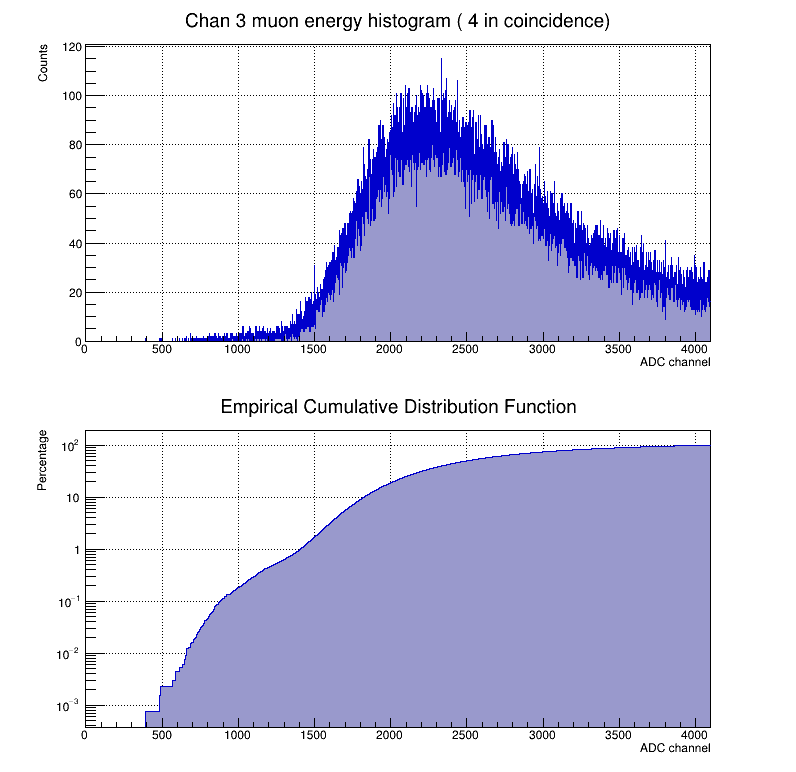

In [27]:
hist = dir.Get("_F_EnergyCH3@DT5751_1615;1")
#hist.SetNormFactor(100)
hist_cumu= hist.GetCumulative();
hist_cumu.Scale(100./hist.Integral()); # to make the y axis a percentage 
c= ROOT.TCanvas("c0"," ",800,800)
c.Divide(1,2);
c.cd(1);
hist.SetTitle("Chan 3 muon energy histogram ( 4 in coincidence)")
gPad.SetGrid();
hist.GetYaxis().SetTitleOffset(1);
hist.Draw();
c.cd(2);
gPad.SetLogy(1);
gPad.SetGrid();
hist_cumu.SetTitle("Empirical Cumulative Distribution Function")
hist_cumu.GetYaxis().SetTitle("Percentage");
hist_cumu.GetYaxis().SetTitleOffset(1);
hist_cumu.Draw();
c.Draw()
c.SaveAs("/Users/bertabeltran/SMUT/data/CumulativeChan3.pdf")